In [21]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

Dataset A (Loan)
1. person_age = Usia dari orang tersebut
2. person_gender = Gender dari orang tersebut
3. person_education = Tingkat pendidikan tertinggi
4. person_income = Pendapatan tahunan
5. person_emp_exp = Tahun pengalaman bekerja
6. person_home_ownership = Status kepemilikan tempat huni
7. loan_amnt = Jumlah pinjaman yang diminta
8. loan_intent = Tujuan dari pinjaman
9. loan_int_rate = Suku bunga pinjaman
10. loan_percent_income = Jumlah pinjaman sebagai persentase dari pendapatan tahunan
11. cb_person_cred_hist_length = Durasi kredit dalam tahun
12. credit_score = Skor kredit dari orang tersebut
13. previous_loan_defaults_on_file = Indikator tunggakan pinjaman sebelumnya
14. loan_status (target variable) = Persetujuan pinjaman; 1: diterima dan 0: ditolak

# EDA

In [22]:
# Dataset
data = pd.read_csv("Dataset_A_loan.csv")

data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [23]:
# Summary of data
data.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.275000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.018223e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,7.331158e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.726725e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.705500e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.582125e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,5.556399e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   42750 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [25]:
data.describe(include = 'object')

,person_gender,person_education,person_home_ownership,loan_intent,previous_loan_defaults_on_file
count,45000,45000,45000,45000,45000
unique,4,5,4,6,2
top,male,Bachelor,RENT,EDUCATION,Yes
freq,24799,13399,23443,9153,22858


In [26]:
# Check the "person_gender" column to see if there are any other inconsistencies (4 unique values)
print(data["person_gender"].value_counts())

person_gender
male       24799
female     20111
Male          45
fe male       45
Name: count, dtype: int64


In [27]:
# Change the inconsistent value in "person_gender" to their proper gender value
data["person_gender"] = data["person_gender"].apply(
    lambda x: x.strip().lower().replace(" ", "") if isinstance(x, str) else x
)

In [28]:
# Check for duplicate value
print(data.duplicated().sum())

0


In [29]:
# Check for missing value
print(data.isnull().sum())

person_age                           0
person_gender                        0
person_education                     0
person_income                     2250
person_emp_exp                       0
person_home_ownership                0
loan_amnt                            0
loan_intent                          0
loan_int_rate                        0
loan_percent_income                  0
cb_person_cred_hist_length           0
credit_score                         0
previous_loan_defaults_on_file       0
loan_status                          0
dtype: int64


In [30]:
# Drop missing value
data = data.dropna(subset = ['person_income'])

In [31]:
# Check whether age has any decimal points since its datatype is a float
decimal_ages = data['person_age'] % 1 != 0
decimal_count = decimal_ages.sum()
print(f'Number of ages with decimals: {decimal_count}')

Number of ages with decimals: 0


In [32]:
# Seperate the numerical data type with the categorical data type
numerical = []
categorical = []

for i in data.columns:
    if data[i].dtype in ['int64', 'float64']:
        numerical.append(i)
    elif data[i].dtype == 'object':
        categorical.append(i)

print(f"Numerical columns: {numerical}")
print(f"Categorical columns: {categorical}")

Numerical columns: ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'loan_status']
Categorical columns: ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']


In [33]:
# Univariate Analysis of each column
print(data[numerical].describe())

         person_age  person_income  person_emp_exp     loan_amnt  \
count  42750.000000   4.275000e+04    42750.000000  42750.000000   
mean      27.758316   8.018223e+04        5.403719   9590.141333   
std        6.020136   7.331158e+04        6.037492   6323.276102   
min       20.000000   8.000000e+03        0.000000    500.000000   
25%       24.000000   4.726725e+04        1.000000   5000.000000   
50%       26.000000   6.705500e+04        4.000000   8000.000000   
75%       30.000000   9.582125e+04        8.000000  12250.000000   
max      144.000000   5.556399e+06      125.000000  35000.000000   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
count   42750.000000         42750.000000                42750.000000   
mean       11.005214             0.139682                    5.862316   
std         2.979434             0.087091                    3.875056   
min         5.420000             0.000000                    2.000000   
25%         8.590000  

In [34]:
for i in categorical:
       print(data[i].value_counts(), '\n')

person_gender
male      23612
female    19138
Name: count, dtype: int64 

person_education
Bachelor       12735
Associate      11432
High School    11383
Master          6608
Doctorate        592
Name: count, dtype: int64 

person_home_ownership
RENT        22274
MORTGAGE    17560
OWN          2801
OTHER         115
Name: count, dtype: int64 

loan_intent
EDUCATION            8708
MEDICAL              8110
VENTURE              7412
PERSONAL             7161
DEBTCONSOLIDATION    6795
HOMEIMPROVEMENT      4564
Name: count, dtype: int64 

previous_loan_defaults_on_file
Yes    21735
No     21015
Name: count, dtype: int64 



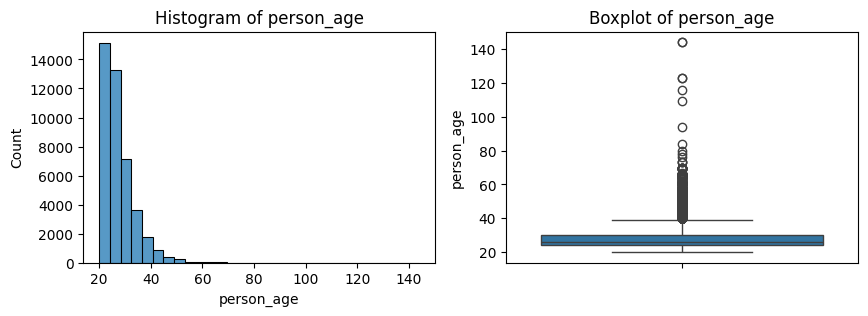

person_age - Skewness: 2.4591243199025126
person_age - Kurtosis: 16.561129027728377


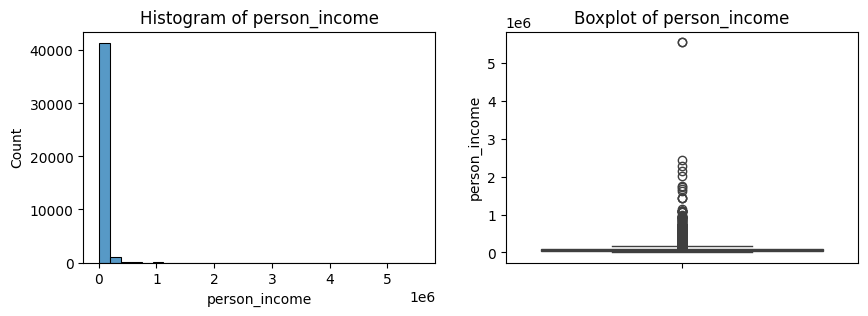

person_income - Skewness: 25.606739128253405
person_income - Kurtosis: 1569.8526113553646


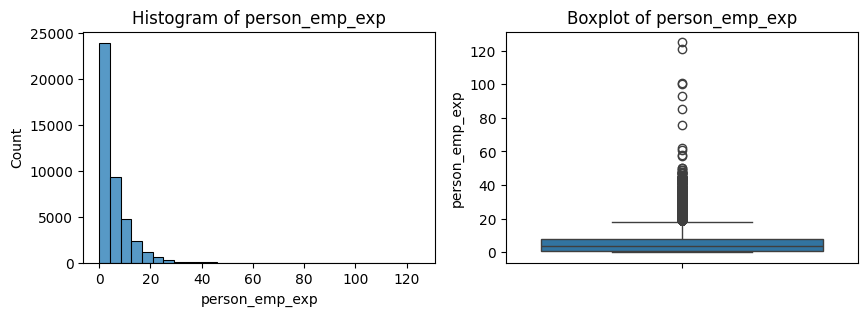

person_emp_exp - Skewness: 2.500460473470813
person_emp_exp - Kurtosis: 16.903857857636556


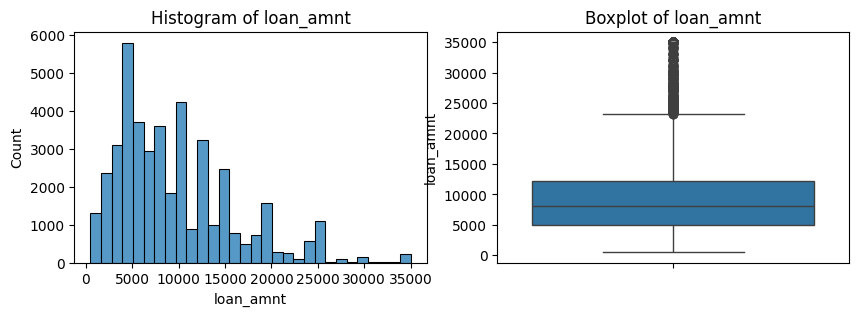

loan_amnt - Skewness: 1.1810577555436625
loan_amnt - Kurtosis: 1.3543997596811579


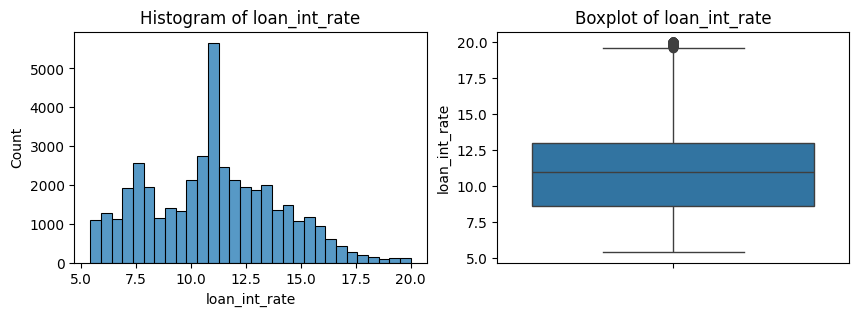

loan_int_rate - Skewness: 0.2137813397883363
loan_int_rate - Kurtosis: -0.41915253346420833


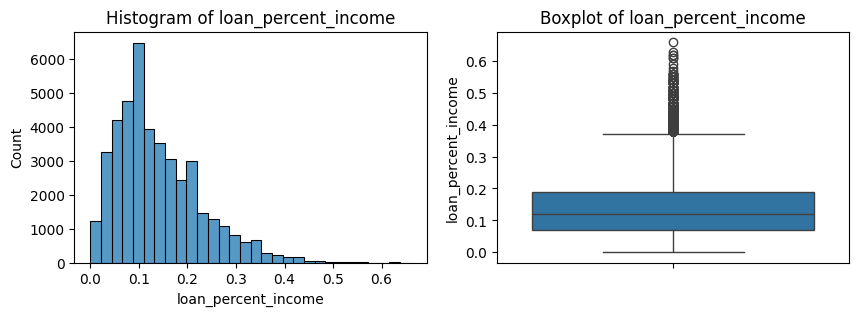

loan_percent_income - Skewness: 1.0340992858025388
loan_percent_income - Kurtosis: 1.0976954446256189


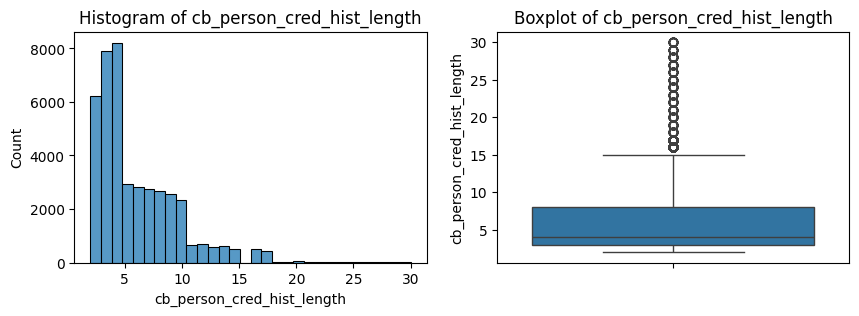

cb_person_cred_hist_length - Skewness: 1.6369240166449919
cb_person_cred_hist_length - Kurtosis: 3.768470736687881


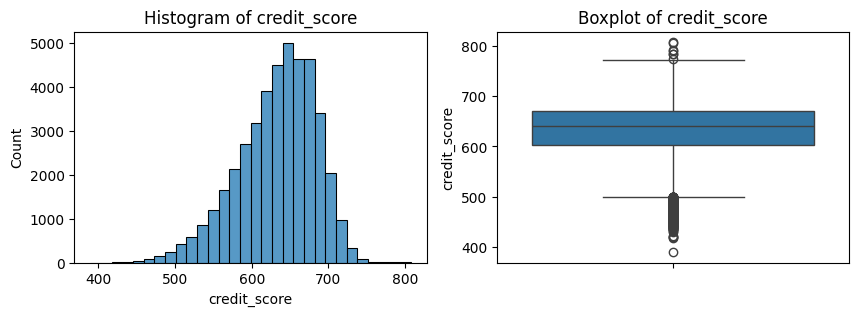

credit_score - Skewness: -0.6158224808139672
credit_score - Kurtosis: 0.20559585946758752


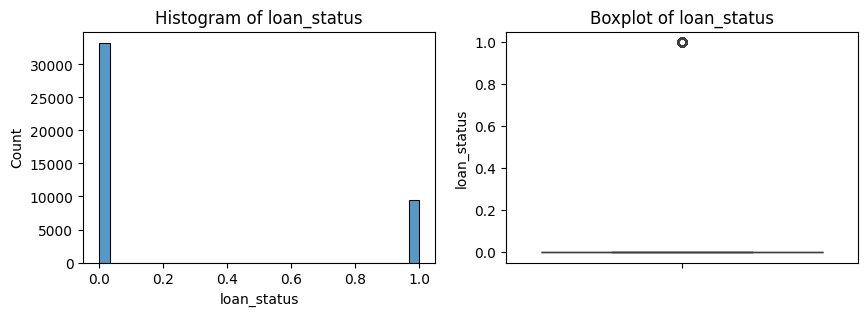

loan_status - Skewness: 1.3412445983107804
loan_status - Kurtosis: -0.20107233658386248


In [35]:
# Finding the distribution and outliers of each numerical column
def check_distribution_outliers(data, numerical):
    for i in numerical:
        plt.figure(figsize = (10, 3))

        # Plot Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(data[i], bins = 30)
        plt.title(f'Histogram of {i}')

        # Plot Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(y = data[i])
        plt.title(f'Boxplot of {i}')

        plt.show()

        # Print skewness and kurtosis for each column
        print(f'{i} - Skewness: {data[i].skew()}')
        print(f'{i} - Kurtosis: {data[i].kurt()}')

check_distribution_outliers(data, numerical)

There are certainly outliers visible in the age, income, and experience columns. However, these outliers are not necessarily incorrect, as it's possible for people of various ages, income levels, and work experience to apply for loans. Since this case is using tree-based models, which are not sensitive to skewed data or outliers, we will ignore these outliers.

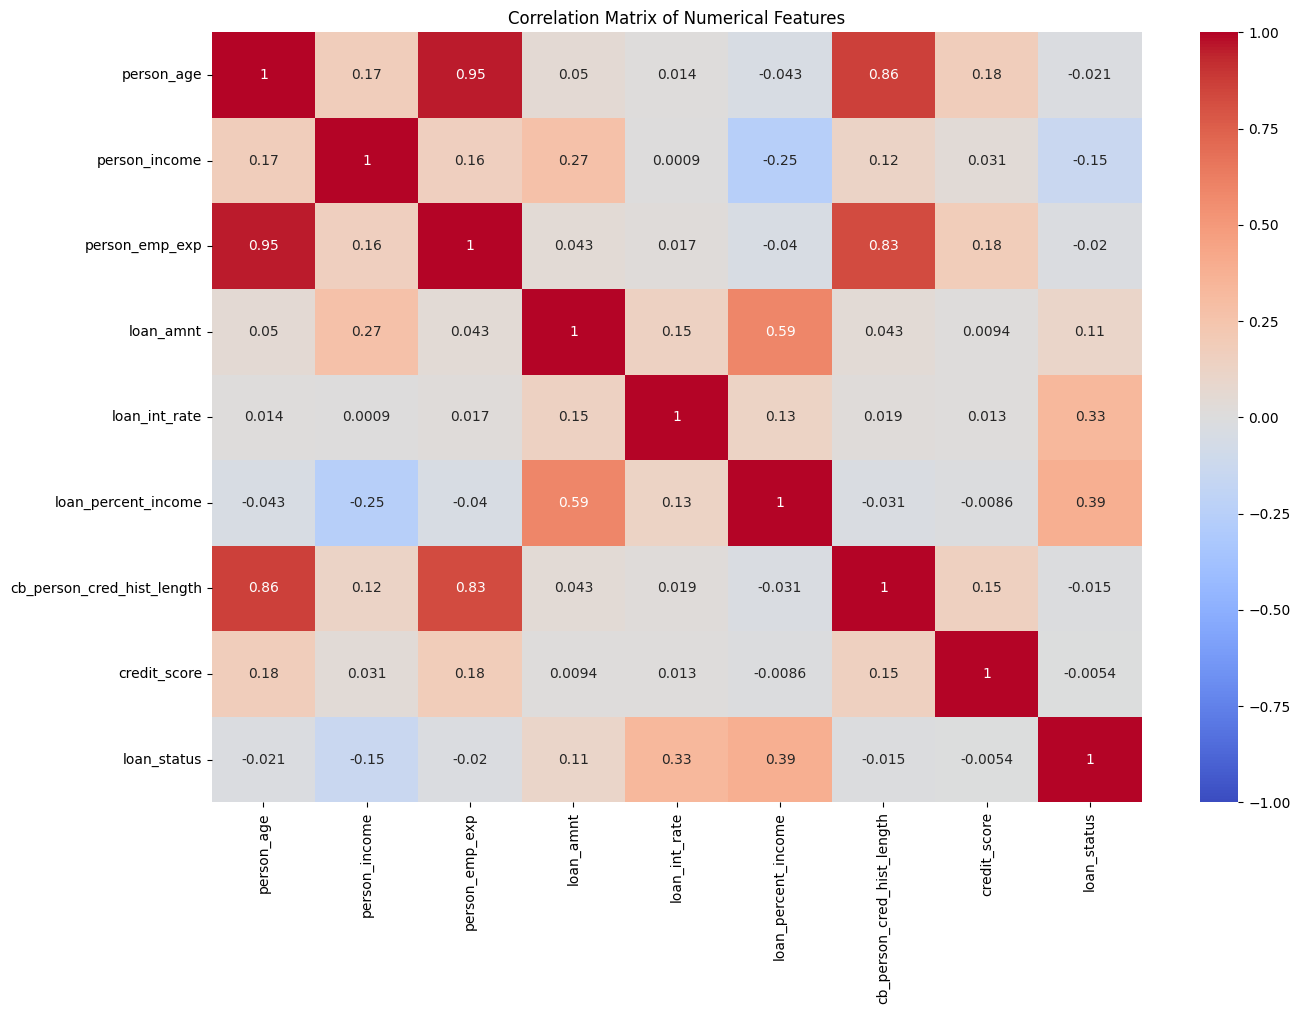

In [36]:
# Bivariate Analysis with correlation check
correlation_matrix = data[numerical].corr()

plt.figure(figsize = (15, 10))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

Most features in the dataset show weak correlations with loan status, but a few stand out with stronger relationships. For example, loan percent income **0.39** and loan int rate **0.33** have relatively higher correlations, indicating they could have a more significant impact on loan approval decisions. Additionally, there is a very strong correlation between age and work experience **0.95**, suggesting that these two variables tend to increase together and might provide similar information

# Preprocessing

In [37]:
# Seperate target variable with the dataset
numerical_features = [col for col in numerical if col != 'loan_status']
categorical_features = categorical.copy()

X = data[numerical_features + categorical_features]
y = data['loan_status']

In [38]:
# OneHot encode categorical
encoder = OneHotEncoder(sparse_output = False, handle_unknown = 'ignore')
X_cat_encoded = encoder.fit_transform(X[categorical_features])
X_cat_encoded_df = pd.DataFrame(X_cat_encoded, columns = encoder.get_feature_names_out(categorical_features))

In [39]:
# Scale numerical
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X[numerical_features])
X_num_scaled_df = pd.DataFrame(X_num_scaled, columns = numerical_features)

In [40]:
# Combine data
X_processed = pd.concat([X_num_scaled_df.reset_index(drop = True), X_cat_encoded_df.reset_index(drop = True)], axis = 1)
X_processed.head()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,person_gender_female,person_gender_male,...,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_No,previous_loan_defaults_on_file_Yes
0,-0.956520,-0.112320,-0.895038,4.018511,1.683153,4.022476,-0.738660,-1.421575,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,-1.122632,-0.926198,-0.895038,-1.358511,0.045239,-0.685291,-0.996724,-2.552133,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.458187,-0.924070,-0.398137,-0.646847,0.625893,3.448358,-0.738660,0.046166,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,-0.790409,-0.005855,-0.895038,4.018511,1.417999,3.448358,-0.996724,0.839540,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,-0.624298,-0.191612,-0.729404,4.018511,1.095787,4.481771,-0.480596,-0.925717,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [41]:
# Splitting
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size = 0.2, random_state = 42)

# Model

In [42]:
# Initialize model
rf = RandomForestClassifier(random_state = 42)
xgb = XGBClassifier(random_state = 42, eval_metric = 'logloss')

In [43]:
# Function for Training and Evaluating
def model_train_evaluate(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    print(f"\n{model.__class__.__name__} Performance:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
    print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")
    
    return model

In [44]:
# Train and Compare
print("=== Model Comparison ===")
rf_model = model_train_evaluate(rf, X_train, y_train, X_test, y_test)
xgb_model = model_train_evaluate(xgb, X_train, y_train, X_test, y_test)

=== Model Comparison ===

RandomForestClassifier Performance:
Accuracy: 0.9292
Precision: 0.8976
Recall: 0.7682
F1-Score: 0.8279
ROC AUC: 0.9742

XGBClassifier Performance:
Accuracy: 0.9352
Precision: 0.8851
Recall: 0.8131
F1-Score: 0.8476
ROC AUC: 0.9786


# Pickle

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import pickle

In [46]:
# Recreate preprocessing
preprocessor = ColumnTransformer([
    ('numerical', StandardScaler(), numerical_features),
    ('categorical', OneHotEncoder(handle_unknown = 'ignore'), categorical_features)
])

In [47]:
# Create pipeline
best_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', xgb_model)
])

In [48]:
# Save pipeline
with open('loan_model.pkl', 'wb') as f:
    pickle.dump(best_pipeline, f)